<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%203/Question%201%20-%20EDA/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

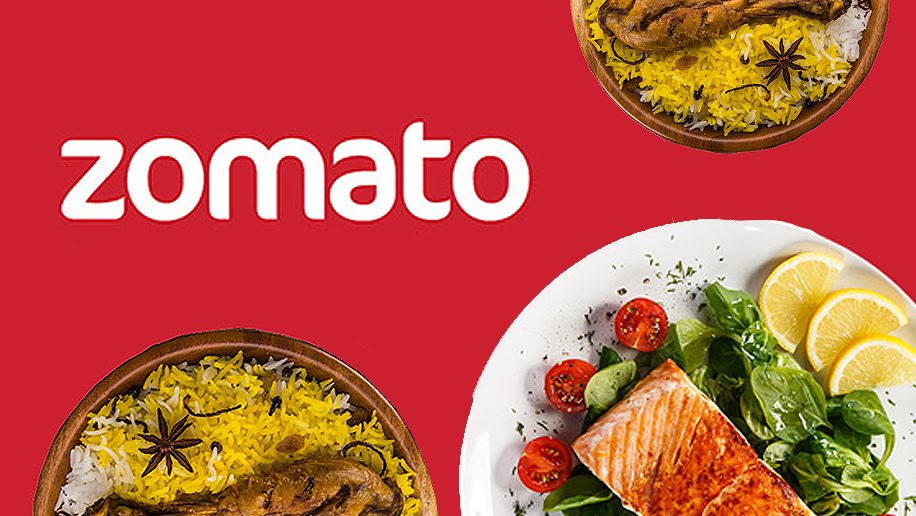








### **Exploratory Data Analysis**

Performing exploratory data analysis on zomato dataset. Zomato is an online food ordering application used(where people can view, rate and review restaurants) in many countries, predominantly in India.

The dataset contains many columns such as 
 - Restaurant ID : Unique ID for every restaurant
 - Country Code : Code of the country in which the restaurant is located
 - City : City in which the restaurant is located
 - Address : Address of the restaurant
 - Locality : Location of where the restaurant is located in the city
 - Locality Verbose : Detailed description of the locality
 - Latitude : Latitude co-ordinate of the restaurant
 - Longitude : Longitude co-ordinate of the restaurant
 - Cuisines: Cuisines offered by the restaurant 
 - Average Cost for two: Cost for two people in different currencies
 - Currency: Currency of the country in which the restaurant is located
 - Has Table booking: yes/no
 - Has Online delivery: yes/ no
 - Is delivering: yes/ no
 - Switch to order menu: yes/no
 - Price range: Range of price of the food in the restaurant
 - Aggregate Rating: Average rating out of 5
 - Rating color: The color is assigned based on the average rating
 - Rating text: Rating in terms of text such as Excellent, Very good, good, average and poor
 - Votes: The number of people that have rated the restaurant

In [ ]:
!pip install pyngrok
!pip install flask-ngrok
!ngrok authtoken 2FestsSpXuhA6YoKoIJtsVKBf0o_2HUsoXe3cst8PkZZ7Sx6j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=95fa82644041b86fe7b3017465686bafcb0621f1efb793545988b14ce70742f2
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Import Statements

In [ ]:
#for the plots and file reads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# For the Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import requests, io, cv2

#For the map
import plotly.express as px
import plotly.io as pi

#For d3.js
import pprint
import os
import threading

from flask import Flask, request, jsonify
from flask import render_template
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok

my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
#bk_img = plt.imread("/content/drive/MyDrive/DataMining_Datasets/zomato_.jpg")

Reading the CSV file with the zomato dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%203/Datasets/zomato_.csv', encoding = 'latin-1')

Viewing the Columns in the dataset

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Viewing the datatypes of the columns in the dataset

In [ ]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Viewing the first 5 records

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


The Correlation Matrix - to determine the correlation between the features in the dataset given

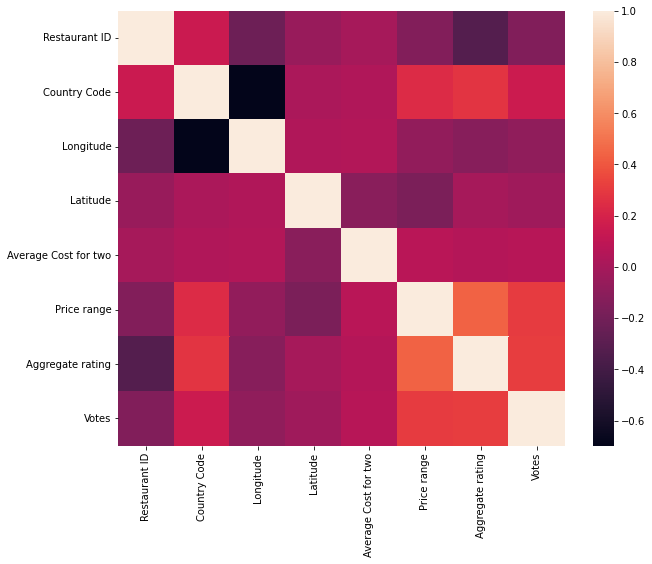

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

For the integer values in the dataset, viewing various values such as mean, standard deviation etc. for every column

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Finding the number of rows and columns in the dataset

In [ ]:
print("The data has a size of: ")
df.shape

The data has a size of: 


(9551, 21)

Finding missing/Null values

In [ ]:
print("Missing values in data: \n")
df.isnull().sum()

Missing values in data: 



Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Plot to visualize the distribution of null values in every column 
 - In this case since there is very small number of nulls in the cuisines column, which is shown in the visual below

<Figure size 720x432 with 0 Axes>

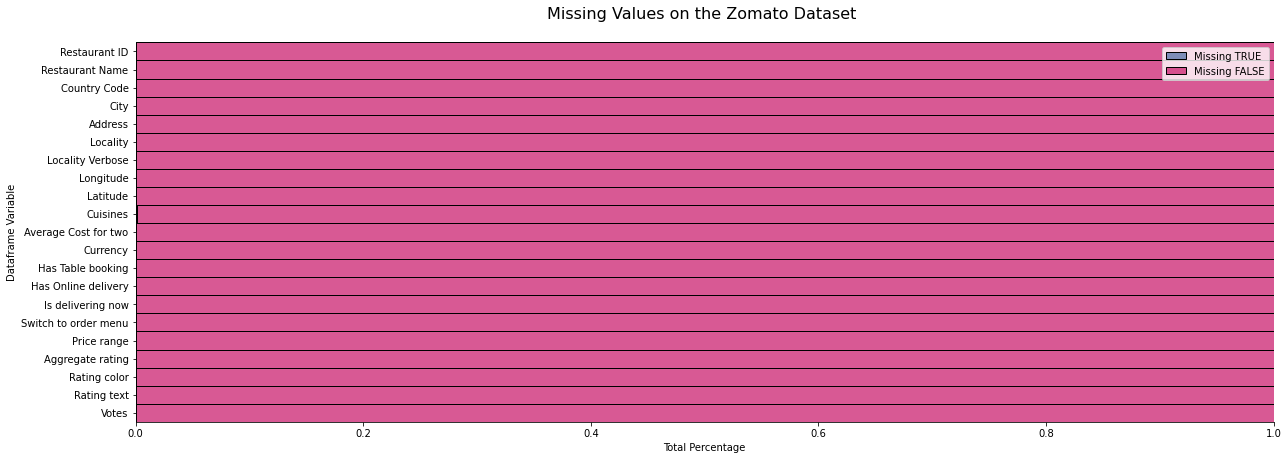

In [ ]:
# Show a dataframe of missing values
plt.figure(figsize=(10,6))

sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    # Change aspect of the chart
    aspect=3,
    height=6,
    # Change colors
    palette=[my_colors[2], my_colors[5]], 
    legend=False)

plt.title("Missing Values on the Zomato Dataset \n", size=16)
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.legend(["Missing TRUE", "Missing FALSE"]);

Reading the country csv file, to map the country codes in the zomato dataset to the corresponding country names

In [ ]:
df_country = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%203/Datasets/country_code.csv')          

View first 5 countries

In [ ]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Merging zomato dataset country code with Country name of country dataset and assigning the merged data to zomato_df dataframe

In [ ]:
zomato_df = pd.merge(df, df_country, on = 'Country Code')

Checking the column names and datatypes of the dataset

In [ ]:
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## **Exploring the values in the dataset**

### D3.JS Visualization


d3.js has been used for interactive visualization 
  - first the bar chart shows the top 5 countries on zomato(top 5 countries denotes countries with most number of restaurants on zomato) 
  - clicking on a country bar goes to the next level on the hierarchy - top 5 cities within that country with most number of restaurants on zomato
  - clicking on a city bar goes to the next level in the hierarchy - top 5 localities within that city, with most number of restaurants on zomato

Creating directories for the html and javascript files

In [ ]:
%mkdir templates -p
%mkdir static -p
%mkdir static/js -p

Setting default page layout and styles, loading d3.js during page load

In [ ]:
%%writefile templates/barchart.html

<html>
   <head>
      <script type = "text/javascript" src = "https://d3js.org/d3.v7.min.js"></script>
      <style>
         svg {
            display: block;
            margin: auto;
         }

         svg rect {
            fill: #AF0848;
         }

         svg text {
            fill: black;
            font: 12px sans-serif;
            text-anchor: end;
         }

      </style>
   </head>

   <body>
      <script src="/static/js/barchart.js"></script>

   </body>
</html>


Writing templates/barchart.html


Using d3 visualization for viewing number of restaurants in an interactive hierarchical bar chart. Interaction goes from country level to city level to locality level.

In [ ]:
%%writefile static/js/barchart.js

//setting defaults
var height = 750,
  barWidth = 100,
  barHeight = 700,
  chartTopPadding = 25;
  chartBottomPadding = 25;

key = "Country"

//setting up the hierarchy for interaction
var locationMap = {
  "Country": {
    "api": "/zomatoCountryCounts",
    "next": "City",
  },
  "City": {
    "api": "/zomatoCityCounts",
    "next": "Locality",
  },
  "Locality": {
    "api": "/zomatoLocalityCounts",
    "next": "End",
  },
}

function getApiRoute(key, data = '') {
  if (key == 'Country') {
    return locationMap[key].api
  } else if (key == 'End') {
    return '/'
  }

  return `${locationMap[key].api}/${data}`
}

//click bar to view next level
function clickBar(key, data) {
  renderBarChart(locationMap[key].next, data)
}

function renderBarChart(key, data='') {
  //api request to flask server
  fetch(getApiRoute(key, data))
  .then(response => response.json())
  .then(data => {
    json_data =   JSON.parse(data)
    return json_data.data
  })
  .then(data => {

    var x = d3.scaleLinear()
            .domain([0, data.length])
            .range([0, barWidth * data.length]);

    var y = d3.scaleLinear()
            .domain([0, d3.max(data)[key]])
            .range([barHeight, 0]);

    d3.select("svg").remove();

    var graph = d3.select("body")
    .append("svg")
    .attr("height", height)
    .attr("width", barWidth * data.length);

    var bar = graph.selectAll("g")
      .data(data)
      .enter()
      .append("g")
      .attr("transform", function(d, i) {
          return "translate(" + i * barWidth + ",0)";
      })

    //draw bars for the given data
    bar.append("rect")
      .attr("height", function(d) {
        return barHeight - y(d[key])
      })
      .attr("y", function(d) {
        return y(d[key]) + chartTopPadding;
      })
      .attr("width", barWidth - 1)
      .attr("onclick", function(d) {
        return `clickBar('${key}', '${d.index}')`
      });

    bar.on('mouseenter', function (actual, i) {
      d3.select(this).attr('opacity', 0.5)
      d3.select(this).attr('cursor', 'pointer')
    })
    bar.on('mouseleave', function (actual, i) {
      d3.select(this).attr('opacity', 1)
    })

    //for bar data value
    graph.selectAll("text")
    .data(data)
    .enter()
    .append("text")
    .text(function(d) {
      return d[key];
    })
    .attr("y", function(d, i) {
      return y(d[key]) + (chartTopPadding - 2);
    })
    .attr("x", function(d, i) {
      return barWidth * i + (barWidth / 2);
    })
    .attr("fill", "#A64C38");
    
    //for bar labels
    graph.selectAll("p")
      .data(data)
      .enter()
      .append("text")
      .text(function(d) {
        return d.index
      })
      .attr("y", function(d, i) {
        console.log("y:", barHeight)
        return height;
      })
      .attr("x", function(d, i) {
        console.log("x:", barWidth * i + (barWidth / 2))
        return 25 + barWidth * i + (barWidth / 2);
      })
      .attr("fill", "#A64C38")
      .attr("text-anchor", "middle")
    })
}

renderBarChart(key)


Writing static/js/barchart.js


In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

port = 8081

Flask server to render the application 

In [ ]:
@app.route("/")
def home():
    return render_template('barchart.html')

@app.route("/zomatoCountryCounts")
def getZomatoCountryCounts():
    counts = zomato_df.Country.value_counts(sort=True).nlargest(5)
    json_data = counts.to_json(orient="table")
    return jsonify(json_data)

@app.route("/zomatoCityCounts/<country>")
def getZomatoCityCounts(country):
    counts = zomato_df[(zomato_df.Country == country)].City.value_counts(sort=True).nlargest(5)
    json_data = counts.to_json(orient="table")
    return jsonify(json_data)

@app.route("/zomatoLocalityCounts/<city>")
def getZomatoLocalityCounts(city):
    counts = zomato_df[(zomato_df.City == city)].Locality.value_counts(sort=True).nlargest(5)
    json_data = counts.to_json(orient="table")
    return jsonify(json_data)

Clicking on "Running on"(*.ngrok.io) URL opens the d3.js visualization

In [ ]:
if __name__ == "__main__":
   app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://39aa-34-74-7-225.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Oct/2022 05:44:34] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2022 05:44:34] "GET /static/js/barchart.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2022 05:44:34] "GET /zomatoCountryCounts HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2022 05:44:36] "GET /zomatoCityCounts/United%20States HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Oct/2022 05:44:39] "GET /zomatoLocalityCounts/Orlando HTTP/1.1" 200 -


Creating a new dataframe

In [ ]:
res  = pd.DataFrame()

In [ ]:
country_names = zomato_df.Country.value_counts().index
values = zomato_df.Country.value_counts().values

Preparing a dataframe with unique country values and it's frequency in the dataset

In [ ]:
for item in zomato_df.Country.value_counts():
  res['countryName'] = (zomato_df.Country.value_counts().index)
  res['value'] = (zomato_df.Country.value_counts().values)

Adding a Map visualizing the countries and its frequency on Zomato 

In [ ]:
fig = px.choropleth(res,
                    locations='countryName', 
                    locationmode="country names", 
                    scope="world",
                    color= values,
                    color_continuous_scale=my_colors
                    )
fig.show(renderer="colab")

([<matplotlib.patches.Wedge at 0x7fc0ff087550>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

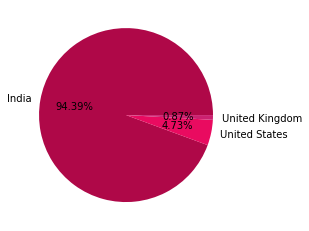

In [ ]:
plt.pie(values[:3], labels = country_names[:3], autopct='%1.2f%%', colors = my_colors)

Finding out the rating values ranges for Poor, Average, Good, Very Good and 

*   List item
*   List item

Excellent Ratings.

Also determining the number of ratings given for every rating value

In [ ]:
ratings = zomato_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

Visualizing ratings of restaurant 
- Not rated is the highest
- Maximum ratings are between 2.8 and 3.9

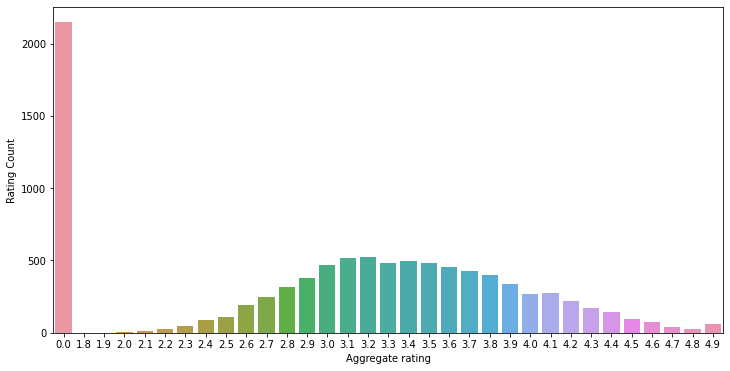

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= "Aggregate rating", y='Rating Count', data= ratings)

Most Frequent ratings

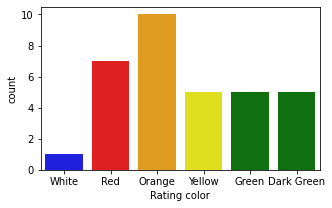

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Rating color", data=ratings, palette = ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

Generating a word cloud to view the most common cuisines on the restaurants in Zomato 

In [ ]:
stopwords = set(STOPWORDS)
text = " ".join(zomato_df.Cuisines.astype(str))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

Visualizing the Most popular Cuisines in the restaurants on Zomato, with a wordcloud

In [ ]:
response = requests.get('https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%203/Datasets/apple-food-clipart-explore-pictures-854621.png')
bytes_im = io.BytesIO(response.content)
apple = cv2.cvtColor(np.array(Image.open(bytes_im)), cv2.COLOR_RGB2BGR)

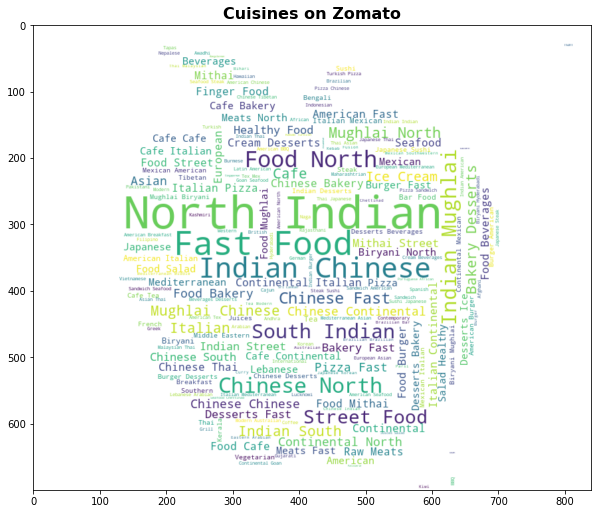

In [ ]:
#img = "https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%203/Datasets/apple-food-clipart-explore-pictures-854621.png"
#img = "/content/drive/MyDrive/DataMining_Datasets/apple-food-clipart-explore-pictures-854621.png"
#plate = np.array(Image.open(img))
wordcloud1 = WordCloud(mask=apple, stopwords=stopwords, background_color="white", width=800, height=500).generate(text)
fig1 = plt.figure(figsize=(10, 10))
plt.title("Cuisines on Zomato", weight = "bold", size = 16)
plt.imshow(wordcloud1, interpolation="bilinear")
#plt.axis('off')
plt.show()

Determining the currencies using by various countries on Zomato

In [ ]:
zomato_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Restaurants offering oline ordering feature on Zomato

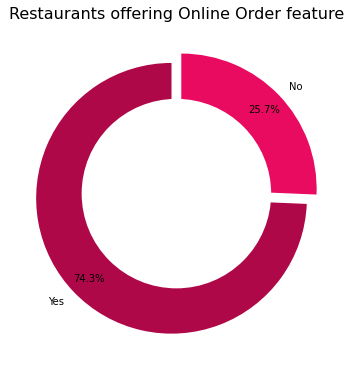

In [ ]:
labels = ['Yes','No']
colors = my_colors
explode = (0.05,0.05)

plt.figure(figsize=(5,5))
plt.pie(zomato_df['Has Online delivery'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants offering Online Order feature", size = "16")
plt.show()

Restaurants with Table booking options on Zomato

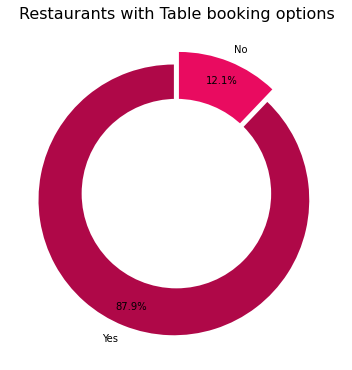

In [ ]:
labels = ['Yes','No']
colors = my_colors
explode = (0.05,0.05)

plt.figure(figsize=(5,5))
plt.pie(zomato_df['Has Table booking'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants with Table booking options", size = '16')
plt.show()

Top 5 cities on Zomato

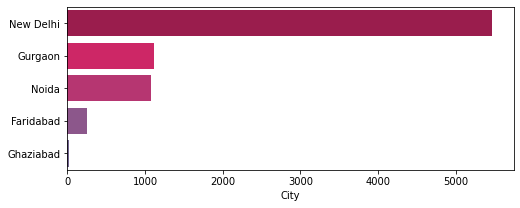

In [ ]:
plt.figure(figsize=(8,3))
loc=zomato_df['City'].value_counts()[0:5]
axs = sns.barplot(x=loc,y=loc.index,palette=my_colors)

**Performing some EDA based on the top city on Zomato - Delhi**
 - performing EDA on a subset of data to understand features and the relationship between features
 - For this purpose we are using data of restaurants in Delhi - the city with maxinum restaurants in Zomato

Top localities for restaurants in Delhi on Zomato

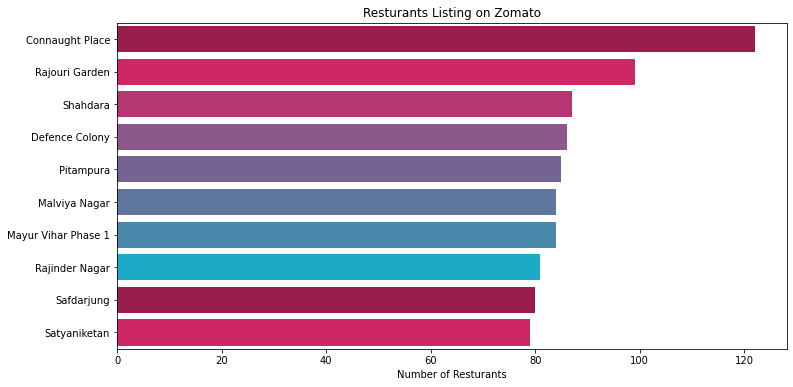

In [ ]:
Delhi = zomato_df[(zomato_df.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index, palette = my_colors)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

Visualizing if Restaurants in the lop localities in Delhi Has online delivery.

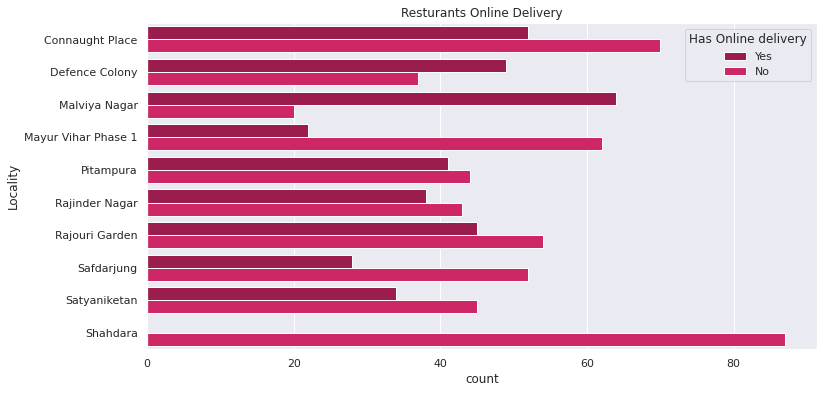

In [ ]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)], palette = my_colors)
plt.title('Resturants Online Delivery');

Understanding the relationship between ratings and cost

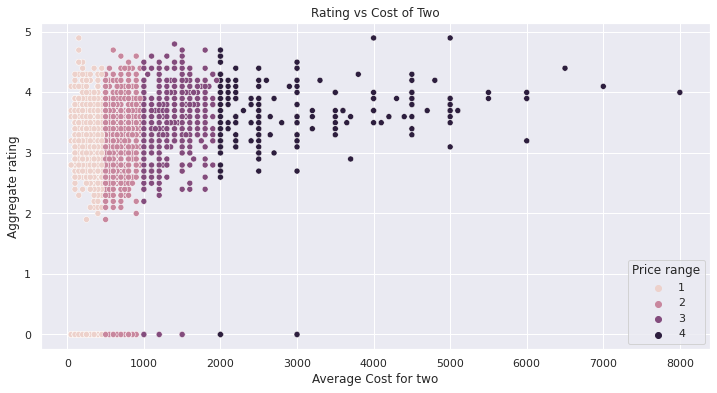

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

Number of countries that have given zero ratings

In [ ]:
zomato_df[zomato_df['Aggregate rating'] == 0.0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Listing number of restaurants that offers online delivery in every country

In [ ]:
zomato_df[zomato_df['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


Listing number of restaurants that does not offer online delivery in every country

In [ ]:
zomato_df[zomato_df['Has Online delivery'] == 'No'].groupby('Country').size().reset_index()

,Country,0
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,6229
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [ ]:
#cuisines_values = zomato_df.Cuisines.value_counts().values
#cuisines_ = zomato_df.Cuisines.value_counts().index
#sns.barplot(x= "Aggregate rating", y='Rating Count', hue = 'Rating color', data= ratings, palette = ['blue', 'red', 'orange', 'yellow', 'green', 'green'])
#city_values = zomato_df.City.value_counts().values
#cities = zomato_df.City.value_counts().index
##plt.pie(cuisines_values[:10], labels=cuisines_[:10],autopct='%1.2f%%')